In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 

In [2]:
import matplotlib.pyplot as plt

In [4]:
students = pd.read_csv('StudentsPerformance_with_headers.csv')
data = pd.DataFrame(data = students)
data

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [12]:
data.describe()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [6]:
set(data['GRADE'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

/tmp/ipykernel_40359/538551336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


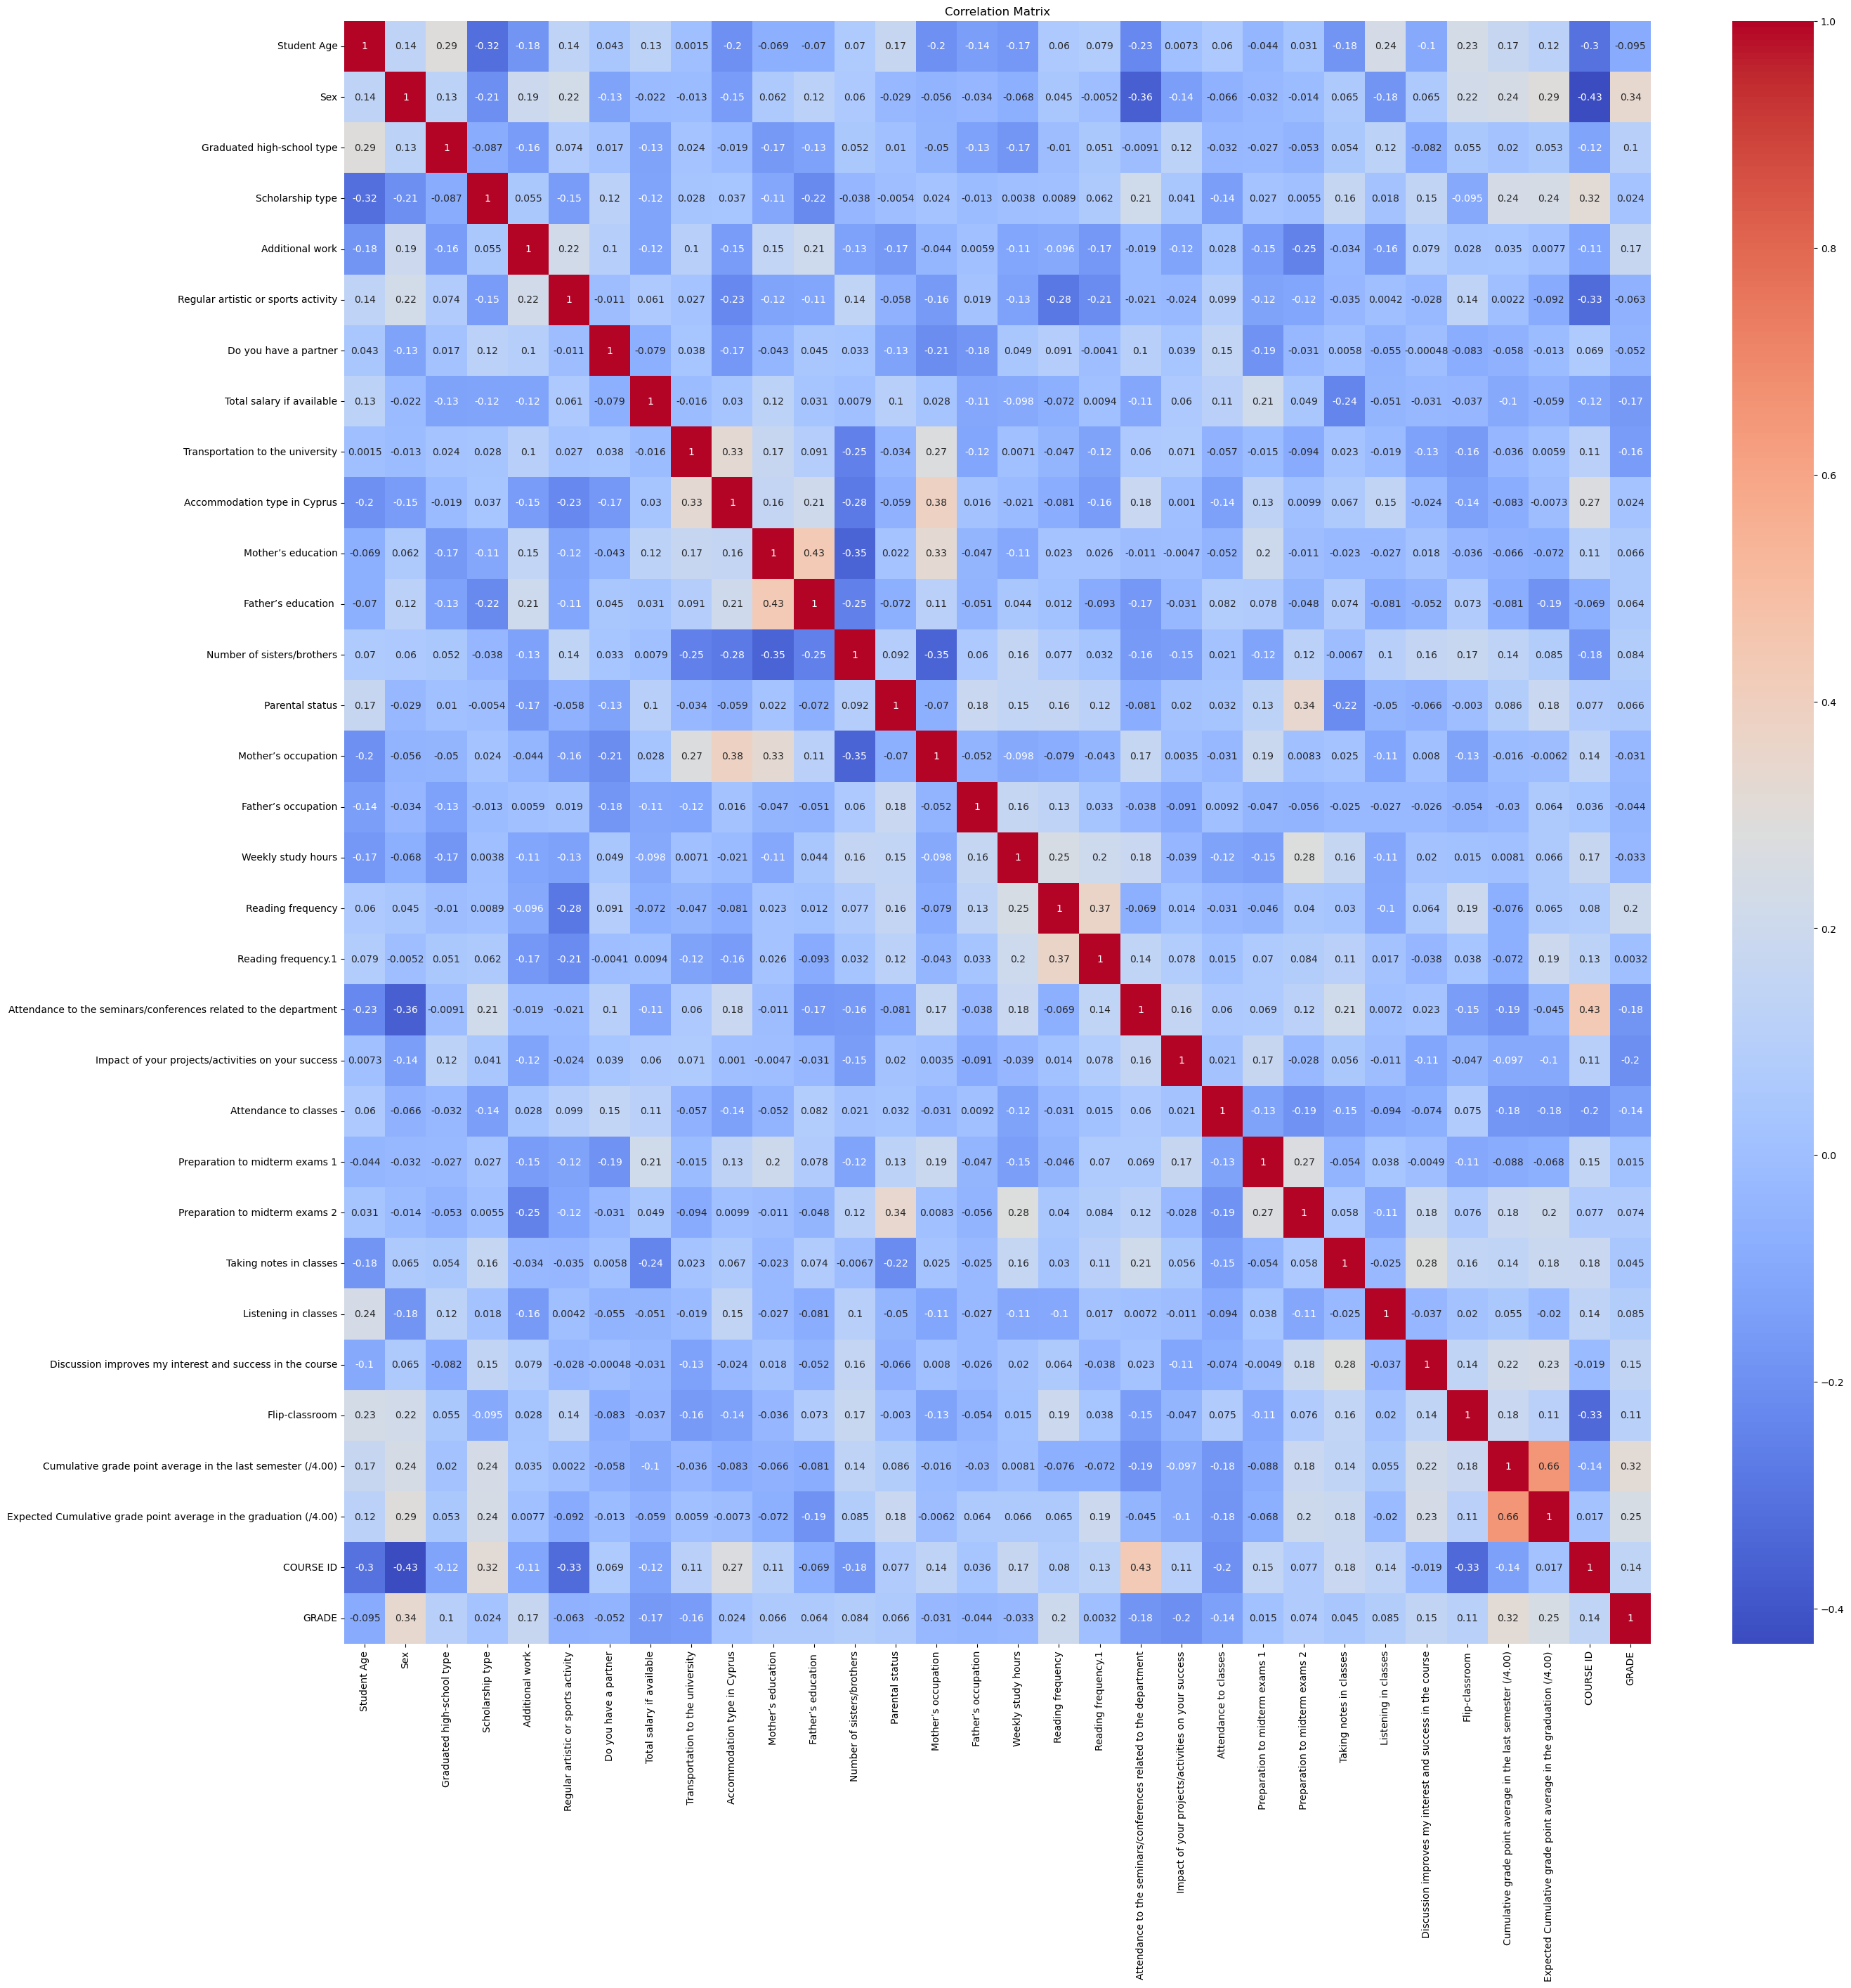

In [7]:

# Построение корреляционной матрицы
correlation_matrix = data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
df_without_str = data[['Student Age', 'Sex', 'Graduated high-school type',
       'Scholarship type', 'Additional work',
       'Regular artistic or sports activity', 'Do you have a partner',
       'Total salary if available', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mother’s education',
       'Father’s education ', 'Number of sisters/brothers', 'Parental status',
       'Mother’s occupation', 'Father’s occupation', 'Weekly study hours',
       'Reading frequency', 'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       'Expected Cumulative grade point average in the graduation (/4.00)',
       'COURSE ID', 'GRADE']]

In [8]:
# Get the top 6 most correlated features for the "GRADE" column
top_corr_features = correlation_matrix['GRADE'].sort_values(ascending=False)[1:7]

# Print the top 6 most correlated features
print(top_corr_features)

Sex                                                                  0.335533
Cumulative grade point average in the last semester (/4.00)          0.315493
Expected Cumulative grade point average in the graduation (/4.00)    0.248588
Reading frequency                                                    0.195617
Additional work                                                      0.167445
Discussion improves my interest and success in the course            0.146547
Name: GRADE, dtype: float64


In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_without_str.values)

In [14]:
df_data_scaled = pd.DataFrame(data_scaled, columns=df_without_str.columns)

In [15]:
df_data_scaled.describe()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
count,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,...,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02
mean,1.960118e-16,-1.960118e-16,1.837611e-16,-4.900295e-17,8.575516e-17,-2.205133e-16,-5.512832e-17,8.575516e-17,1.041313e-16,1.225074e-16,...,-2.450147e-17,-2.695162e-16,6.125368e-17,-1.592596e-16,-1.301641e-16,-8.575516e-17,1.163820e-16,1.470088e-16,1.960118e-16,9.800589e-17
std,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,...,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00
min,-1.015799e+00,-1.224745e+00,-1.764843e+00,-3.203635e+00,-1.399708e+00,-1.224745e+00,-1.173477e+00,-6.172649e-01,-5.869704e-01,-9.356746e-01,...,-5.515025e-01,-4.066045e-01,-2.743977e+00,-1.569251e+00,-2.313146e+00,-9.990153e-01,-1.638252e+00,-1.887666e+00,-9.637263e-01,-1.473725e+00
25%,-1.015799e+00,-1.224745e+00,1.030565e-01,-7.128732e-01,-1.399708e+00,-1.224745e+00,-1.173477e+00,-6.172649e-01,-5.869704e-01,-9.356746e-01,...,-5.515025e-01,-4.066045e-01,-9.677420e-01,-8.205236e-02,-6.527193e-01,-9.990153e-01,-8.669967e-01,-7.928198e-01,-9.637263e-01,-1.017122e+00
50%,6.207659e-01,8.164966e-01,1.030565e-01,-7.128732e-01,7.144345e-01,8.164966e-01,8.521681e-01,-6.172649e-01,-5.869704e-01,3.442576e-01,...,-5.515025e-01,-4.066045e-01,8.084933e-01,-8.205236e-02,-6.527193e-01,2.390806e-01,-9.574197e-02,3.020266e-01,-3.481302e-01,-1.039165e-01
75%,6.207659e-01,8.164966e-01,1.030565e-01,5.325077e-01,7.144345e-01,8.164966e-01,8.521681e-01,3.662890e-01,3.587041e-01,3.442576e-01,...,1.080495e+00,-4.066045e-01,8.084933e-01,1.405147e+00,1.007707e+00,2.390806e-01,6.755128e-01,3.020266e-01,8.830620e-01,8.092893e-01
max,2.257331e+00,8.164966e-01,1.970956e+00,1.777889e+00,7.144345e-01,8.164966e-01,8.521681e-01,3.316951e+00,2.250053e+00,2.904122e+00,...,2.712492e+00,4.506533e+00,8.084933e-01,1.405147e+00,1.007707e+00,1.477176e+00,1.446768e+00,1.396873e+00,1.498658e+00,1.722495e+00


In [ ]:
data_X = data[['Sex', 'Cumulative grade point average in the last semester (/4.00)', 'Reading frequency', 'Additional work', 'Discussion improves my interest and success in the course']]
data_X

,Sex,Cumulative grade point average in the last semester (/4.00),Reading frequency,Additional work,Discussion improves my interest and success in the course
0,2,1,2,1,1
1,2,2,2,1,3
2,2,2,1,2,1
3,1,3,1,1,2
4,2,2,1,2,2
...,...,...,...,...,...
140,1,3,3,1,2
141,1,5,2,2,2
142,1,4,2,2,2
143,1,5,2,1,2


In [ ]:
data_Y = data[['GRADE']]

In [49]:
df_without_str.values

array([[2, 2, 3, ..., 1, 1, 1],
       [2, 2, 3, ..., 3, 1, 1],
       [2, 2, 2, ..., 2, 1, 1],
       ...,
       [1, 1, 1, ..., 3, 9, 1],
       [2, 1, 2, ..., 3, 9, 4],
       [1, 1, 1, ..., 4, 9, 3]])

In [51]:
X = data[['Student Age', 'Sex', 'Graduated high-school type',
       'Scholarship type', 'Additional work',
       'Regular artistic or sports activity', 'Do you have a partner',
       'Total salary if available', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mother’s education',
       'Father’s education ', 'Number of sisters/brothers', 'Parental status',
       'Mother’s occupation', 'Father’s occupation', 'Weekly study hours',
       'Reading frequency', 'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       'Expected Cumulative grade point average in the graduation (/4.00)',
       'COURSE ID']]

In [52]:
Y = data[['GRADE']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [58]:
X_train

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID
9,2,1,2,3,2,2,1,3,4,2,...,2,1,1,2,2,2,2,1,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1
26,2,2,2,3,2,1,1,1,1,1,...,1,1,1,3,3,3,2,2,1,1
120,2,1,1,3,1,1,1,2,2,3,...,2,2,1,3,3,3,2,2,2,8
125,1,1,2,5,1,1,2,1,1,3,...,1,1,2,3,2,3,1,1,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,3,4,2,2,2,1,1,3,...,1,1,1,2,3,3,3,2,2,3
106,1,2,2,4,2,1,2,1,1,2,...,1,3,2,2,2,2,1,4,4,7
14,3,2,2,4,1,1,2,3,4,2,...,1,1,1,2,3,2,1,4,4,1
92,1,2,2,3,2,2,2,1,1,1,...,1,1,1,3,2,3,3,2,2,6


In [57]:
y_test

,GRADE
69,5
140,5
27,1
19,3
42,1
117,1
126,3
108,6
84,7
18,2


In [62]:
y_test.describe()

,GRADE
count,29.000000
mean,3.241379
std,2.181991
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,7.000000


In [67]:
y_test

,GRADE
69,5
140,5
27,1
19,3
42,1
117,1
126,3
108,6
84,7
18,2


In [79]:
from sklearn.linear_model import LinearRegression

In [82]:
linmodel = LinearRegression().fit(X_train, y_train)

In [84]:
y_pred = linmodel.predict(X_test)

In [91]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error

In [89]:
MAE(y_test, y_pred)

2.1432793430957497

In [92]:
mean_squared_error(y_test, y_pred, squared=False)

2.6871063004100892

In [93]:
from sklearn.neighbors import KNeighborsRegressor

In [104]:
knn_regressor = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [105]:
y_pred2 = knn_regressor.predict(X_test)

In [106]:
MAE(y_test, y_pred2)

1.3333333333333335

In [107]:
mean_squared_error(y_test, y_pred2, squared=False)

1.6376789481350582

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
tree = RandomForestRegressor().fit(X_train, y_train)

/tmp/ipykernel_15845/2561561809.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree = RandomForestRegressor().fit(X_train, y_train)


In [112]:
y_pred3 = tree.predict(X_test)

In [113]:
MAE(y_test, y_pred3)

1.0782758620689656

In [114]:
mean_squared_error(y_test, y_pred3, squared=False)

1.3975557480707228

In [115]:
y_pred3

array([5.03, 1.89, 1.72, 1.57, 2.41, 1.86, 1.51, 4.87, 4.43, 2.54, 2.63,
       3.28, 1.5 , 3.85, 5.51, 2.83, 1.91, 3.59, 6.32, 4.67, 5.67, 1.21,
       2.59, 3.52, 3.03, 2.51, 3.43, 6.04, 2.03])

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
knn = KNeighborsClassifier().fit(X_train, y_train)

/home/erdeni/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [118]:
y_class_pred = knn.predict(X_test)

In [119]:
y_class_pred

array([1, 1, 1, 1, 1, 1, 3, 7, 7, 1, 1, 5, 1, 6, 3, 1, 2, 3, 1, 7, 3, 1,
       2, 5, 5, 2, 1, 7, 2])

In [122]:
y_test.values.T

array([[5, 5, 1, 3, 1, 1, 3, 6, 7, 2, 0, 3, 0, 4, 6, 2, 2, 3, 6, 7, 6, 0,
        0, 5, 3, 3, 4, 4, 2]])

In [136]:
Verno = 0

for i in range(len(y_class_pred)):
    if y_class_pred[i] == y_test.values.T[0][i]:
        Verno += 1

In [138]:
Verno/len(y_class_pred)

0.3448275862068966

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
confusion_matrix(y_test, y_class_pred)

array([[0, 3, 1, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0],
       [0, 2, 2, 0, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 2, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1],
       [0, 2, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 2]])

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(y_test, y_class_pred)

0.3448275862068966

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
model = RandomForestClassifier().fit(X_train, y_train)

/tmp/ipykernel_15845/4278517802.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier().fit(X_train, y_train)


In [149]:
y_class_pred2 = model.predict(X_test)

In [150]:
y_class_pred2

array([1, 1, 1, 1, 2, 2, 3, 2, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 7, 6, 3, 1,
       1, 3, 1, 1, 5, 7, 2])

In [151]:
accuracy_score(y_class_pred2, y_test)

0.1724137931034483

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
gdb = GradientBoostingClassifier().fit(X_train, y_train)

/home/erdeni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
y_class_pred3 = gdb.predict(X_test)

In [156]:
accuracy_score(y_test, y_class_pred3)

0.13793103448275862

Из графика можно сделать вывод, что наиболее важные параметры: Sex, Cumulative grade point in the last semester, Expected Cumulative grade (но мы его не будем брать, так как у него высокая корреляция с предшествующим параметром), Reading frequency, Additional work, Discussion improves my interest and success in the course

In [ ]:
train_X = data_X[data_X.index <= 100]
train_Y = data_Y[data_Y.index <= 100]
test_X =  data_X[data_X.index > 100]
test_Y =  data_Y[data_X.index > 100]

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(test_X)

In [ ]:
y_pred

array([2, 1, 2, 2, 1, 5, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 5,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 5, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy = accuracy_score(test_Y, y_pred)
report = classification_report(test_Y, y_pred)

print("GradientBoostingClassifier Model Accuracy:", accuracy)
print("Classification Report:")
print(report)

GradientBoostingClassifier Model Accuracy: 0.22727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.26      0.55      0.35        11
           2       0.21      0.33      0.26         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.23        44
   macro avg       0.10      0.17      0.13        44
weighted avg       0.12      0.23      0.16        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
